# UMAP clustering for the methylation signature Position Weight Matrices
## Wastewater data

In [ ]:
import pandas as pd
import numpy as np
import warnings

from matplotlib.colors import ListedColormap

import os 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import seaborn as sns
import os
from PIL import Image, ImageFont
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
import matplotlib.lines as mlines


seed = 98
import matplotlib.pyplot as plt
import seaborn as sns

# EFF1 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_matrices_top50/flattened/EFF1_concat_matrices_top50.tsv'
EFF1_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(EFF1_matrices.shape[0])

In [ ]:
print(EFF1_matrices.shape)
EFF1_matrices.head()

In [ ]:
EFF1_df = EFF1_matrices.loc[(EFF1_matrices.iloc[:, :492] != 0).any(axis=1)]

In [ ]:
EFF1_df['sample'].value_counts()
print(EFF1_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_mod_counts.txt'

EFF1_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_mod_counts.shape[0])
EFF1_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_mod_counts.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_mod_counts.loc[EFF1_df_ext.index]

# Check the min mod counts
EFF1_df_ordered['mod_count'].min()

# Log transform
EFF1_df_ordered['mod_count_log'] = np.log2(EFF1_df_ordered['mod_count'])

EFF1_df_mod_counts = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_mod_counts.iloc[:, :-3])
EFF1_df_mod_counts.head()
EFF1_df = EFF1_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_ARG_counts.txt'

EFF1_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_ARG_counts.shape[0])
EFF1_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_ARG_counts.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_ARG_counts.loc[EFF1_df_ext.index]

EFF1_df_ARG_counts = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_ARG_counts.iloc[:, :-4])
EFF1_df_ARG_counts.head()
EFF1_df = EFF1_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_ARG_names.txt'

EFF1_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_ARG_names.shape[0])
EFF1_df_ARG_names.head()

# Replace NaN with empty
EFF1_df_ARG_names = EFF1_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_ARG_names.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_ARG_names.loc[EFF1_df_ext.index]

EFF1_df_ARG_names = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_ARG_names.iloc[:, :-5])
EFF1_df_ARG_names.head()
EFF1_df = EFF1_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_contigs_lengths.txt'

EFF1_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_contigs_lengths.shape[0])
EFF1_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_contigs_lengths.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_contigs_lengths.loc[EFF1_df_ext.index]

# Log transform
EFF1_df_ordered['length_sqrt'] = np.sqrt(EFF1_df_ordered['length'])

# Concat
EFF1_df_contigs_lengths = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_contigs_lengths.iloc[:, :-7])
EFF1_df_contigs_lengths.head()
EFF1_df = EFF1_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_fARGene_names.txt'

EFF1_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_fARGene_names.shape[0])
EFF1_df_fARGene_names.head()

# Replace NaN with empty
EFF1_df_fARGene_names = EFF1_df_fARGene_names.fillna('')
EFF1_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_fARGene_names.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_fARGene_names.loc[EFF1_df_ext.index]

EFF1_df_fARGene_names = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_fARGene_names.iloc[:, :-8])
EFF1_df_fARGene_names.head()
EFF1_df = EFF1_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = EFF1_df[EFF1_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
EFF1_df.head()
#print(EFF1_df.iloc[:, :-8])
#print(EFF1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF1_df.iloc[:, :-8])
        EFF1_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF1_df.index,
            'mod_count':EFF1_df['mod_count'],
            'mod_count_log':EFF1_df['mod_count_log'],
            'ARG_name':EFF1_df['ARG_name'],
            'ARG_count':EFF1_df['ARG_count'],
            'contig_length':EFF1_df['length'],
            'contig_length_sqrt':EFF1_df['length_sqrt'],
            'fARGene_class':EFF1_df['fARGene']
        })

        #EFF1_UMAP_df['ARG_count'] = EFF1_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(EFF1_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        #fig.write_image(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_mod_counts_lengths.png')
        #fig.write_html(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF1_UMAP_df_focused = EFF1_UMAP_df.loc[(EFF1_UMAP_df['UMAP1']>= 3) & (EFF1_UMAP_df['UMAP1']<= 15)
    & (EFF1_UMAP_df['UMAP2']>= 1.5) & (EFF1_UMAP_df['UMAP2']<= 17)]

# Check
EFF1_UMAP_df_focused.head()

EFF1_df_focused = EFF1_df[EFF1_df.index.isin(EFF1_UMAP_df_focused['contig'])]
print(EFF1_df_focused)

In [ ]:
# Save contig IDs
EFF1_focused_contigs = EFF1_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF1_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF1_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(EFF1_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF1_df_focused.iloc[:, :-8])
        EFF1_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF1_df_focused.index,
            'mod_count':EFF1_df_focused['mod_count'],
            'mod_count_log':EFF1_df_focused['mod_count_log'],
            'ARG_name':EFF1_df_focused['ARG_name'],
            'ARG_count':EFF1_df_focused['ARG_count'],
            'contig_length':EFF1_df_focused['length'],
            'contig_length_sqrt':EFF1_df_focused['length_sqrt'],
            'fARGene_class':EFF1_df_focused['fARGene']
        })

        EFF1_UMAP_df_focused['ARG_count'] = EFF1_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(EFF1_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
#EFF1_df_focused.head()
#EFF1_UMAP_df_focused.head()

In [ ]:
# Save data
EFF1_df_focused.to_csv('UMAP_WW_above50/EFF1_df_focused.csv', sep='\t', index=True)
EFF1_UMAP_df_focused.to_csv('UMAP_WW_above50/EFF1_UMAP_df_focused.csv', sep='\t', index=True)

# EFF1: Read in and plot

In [146]:
# Read data
EFF1_df_focused = pd.read_csv('UMAP_WW_above50/EFF1_df_focused.csv', sep='\t', index_col=0, low_memory=False)
EFF1_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/EFF1_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
EFF1_df_focused.head()
EFF1_UMAP_df_focused.head()

UMAP1      UMAP2             contig  mod_count  \
0                                                                      
s20578.ctg024035l  3.368005  12.012340  s20578.ctg024035l       1385   
s10547.ctg012093l  5.964381  -1.525451  s10547.ctg012093l        249   
s15252.ctg017667l  4.820970   1.682285  s15252.ctg017667l        376   
s4110.ctg004596l  -1.469479   4.453772   s4110.ctg004596l        699   
s3414.ctg003811l   3.277642  13.298296   s3414.ctg003811l        412   

                   mod_count_log ARG_name  ARG_count  contig_length  \
0                                                                     
s20578.ctg024035l      10.435670      NaN          0          20145   
s10547.ctg012093l       7.960002      NaN          0          83473   
s15252.ctg017667l       8.554589      NaN          0          26065   
s4110.ctg004596l        9.449149      NaN          0         141108   
s3414.ctg003811l        8.686501      NaN          0          24786   

                   contig_length_sqrt fARGene_class  
0                                                    
s20578.ctg024035l          141.933083           NaN  
s10547.ctg012093l          288.916943           NaN  
s15252.ctg017667l          161.446586           NaN  
s4110.ctg004596l           375.643448           NaN  
s3414.ctg003811l           157.435701           NaN

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

EFF1_UMAP_df_focused['ARG_count'] = EFF1_UMAP_df_focused['ARG_count'].astype(str)

fig = px.scatter(EFF1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_focused_ARG_counts.png')
fig.write_html(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_focused_ARG_counts.html')

## Extract clusters
### C1

### Extract clusters
#### C1

In [152]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF1_df_focused_C1 = EFF1_UMAP_df_focused.loc[(EFF1_UMAP_df_focused['UMAP1']>= 2) & (EFF1_UMAP_df_focused['UMAP1']<= 2.2)
    & (EFF1_UMAP_df_focused['UMAP2']>= 3.6) & (EFF1_UMAP_df_focused['UMAP2']<= 3.7)]

# Check
EFF1_df_focused_C1.head()

EFF1_df_C1 = EFF1_df_focused[EFF1_df_focused.index.isin(EFF1_df_focused_C1['contig'])]
print(EFF1_df_C1)

                   -20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                          
s4795.ctg005380c    0.083931   0.083931   0.010584  -0.299162  -0.028212   
s464.ctg000513c    -0.022961  -0.073536  -0.126807   0.071108   0.197450   
s12088.ctg013891l   0.078648   0.017126   0.078648  -0.071274   0.117656   
s5858.ctg006621c    0.117308   0.150894   0.082555  -0.300582  -0.751767   
s6813.ctg007717c    0.176686   0.112701   0.008322   0.079104   0.145205   
s7338.ctg008328c    0.256574   0.147032   0.023998   0.355292   0.256574   
s4422.ctg004959c   -0.033240   0.052733  -0.231147  -0.033240   0.306082   
s833.ctg000916l     0.057386  -0.051870   0.107841   0.120066  -0.037542   
s166.ctg000182l     0.102172  -0.102257  -0.160635  -0.020623   0.102172   
s37573.ctg045489l   0.349714  -0.113265  -0.180926  -0.331753  -0.331753   
s34991.ctg041983l   0.027508   0.426717  -0.123530   0.095253   0.095253   
s13990.ctg01

In [154]:
# Save contig IDs
EFF1_C1_contigs = EFF1_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF1_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF1_C1_contigs:
        file.write(f"{item}\n")

## Plot fARGene

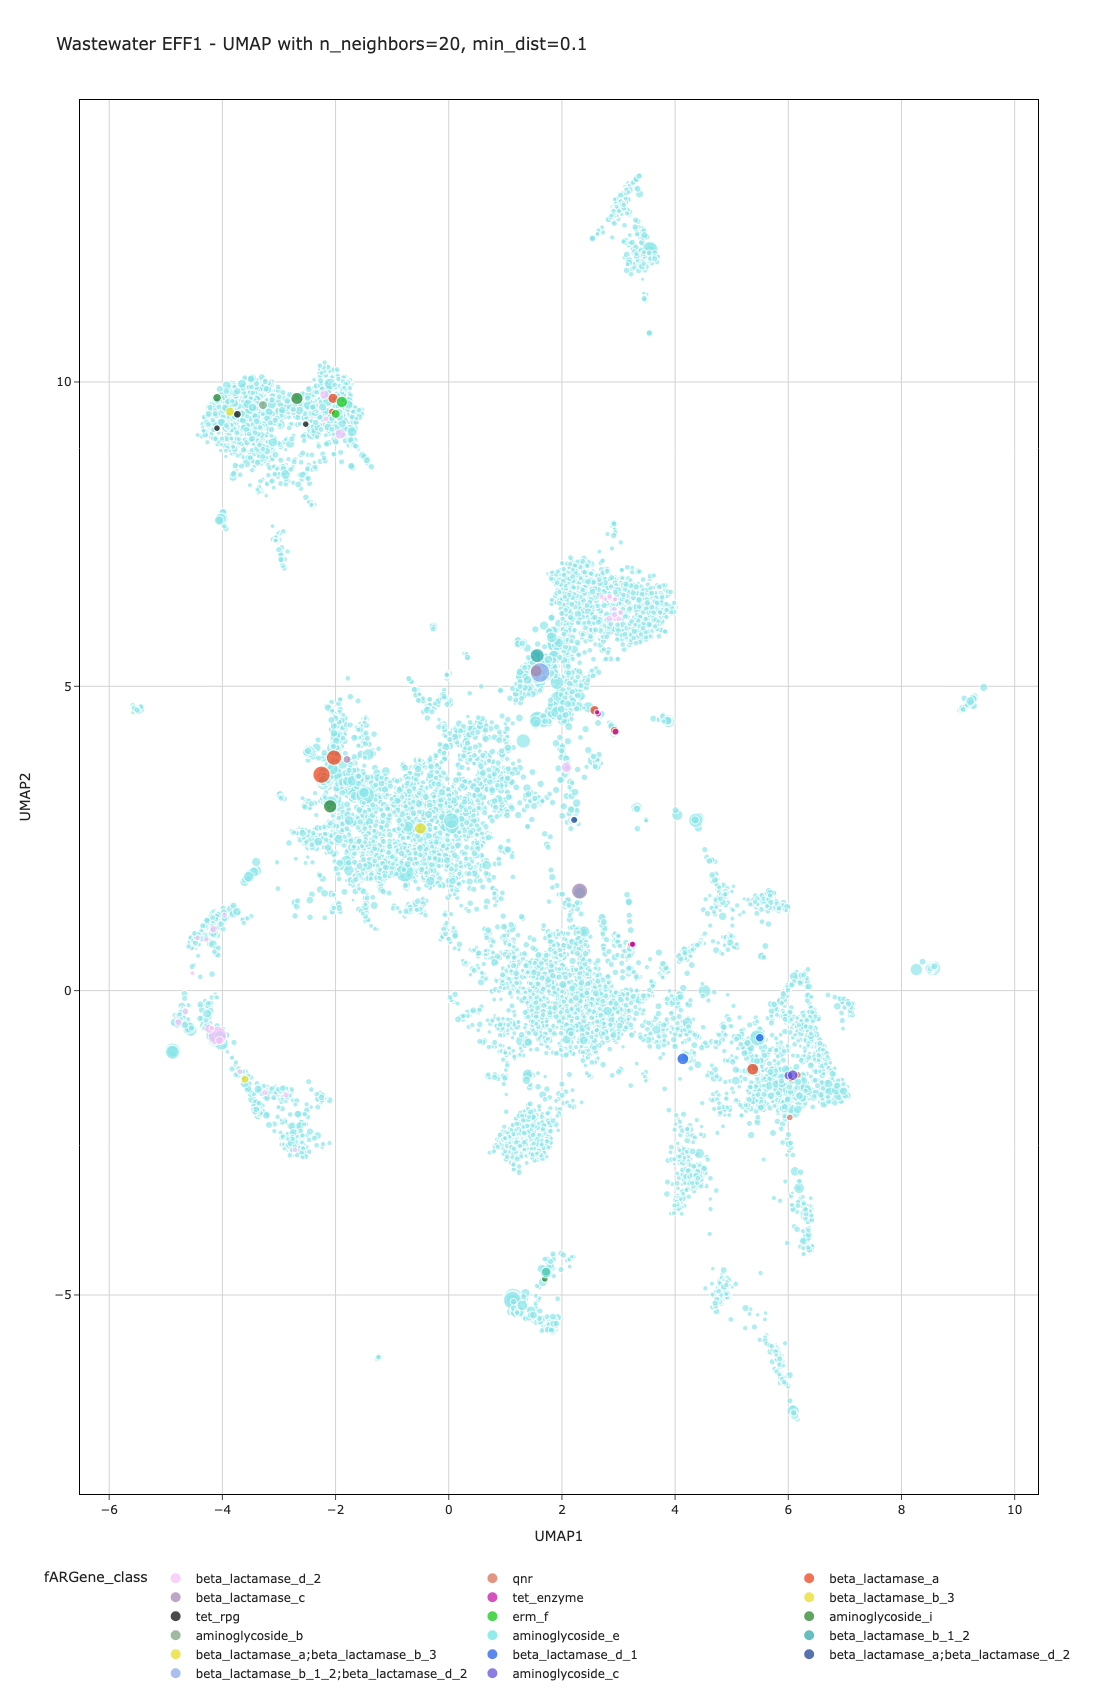

In [150]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'class_a', 'class_b_1_2', 'class_c', 'class_d_1', 'class_d_2', 'mph', 'qnr', 'tet_efflux',
          'tet_rpg', 'tet_enzyme', 'erm_type_a', 'erm_type_f', 'aminoglycoside_model_a', 'aminoglycoside_model_b',
          'aminoglycoside_model_c', 'aminoglycoside_model_d', 'aminoglycoside_model_e', 'aminoglycoside_model_f',
          'aminoglycoside_model_g', 'aminoglycoside_model_h', 'aminoglycoside_model_i']

color_map = {'': '#8ce6e9', 'class_a': "#fabefa", 'class_b_1_2': "#d86950", 'class_c': "#ef360c", 'class_d_1': "#a27faf", 'class_d_2': "#c308a4", 'mph': "#e8db16",
             'qnr': "black", 'tet_efflux': "#04c60a", 'tet_rpg': "#1e7e21", 'tet_enzyme': "#779e78", 'erm_type_a': "#66e4e4", 'erm_type_f': "#25a5a5",
             'aminoglycoside_model_a': "#e8db16", 'aminoglycoside_model_b': "#1656e8", 'aminoglycoside_model_c': "#0f378e",
             'aminoglycoside_model_d': "#86a4eb", 'aminoglycoside_model_e': "#5b48d8", 'aminoglycoside_model_f': "#146eb4",
             'aminoglycoside_model_g': "#6f87f3", 'aminoglycoside_model_h': "#85baec", 'aminoglycoside_model_i': "#04bdfe"}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

EFF1_UMAP_df_focused['fARGene_class'] = EFF1_UMAP_df_focused['fARGene_class'].astype(str)
EFF1_UMAP_df_focused['fARGene_class'] = EFF1_UMAP_df_focused['fARGene_class'].replace('nan', '')
        
fig = px.scatter(EFF1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_fARGene.html')

### Extract clusters
#### C1 (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF1_df_focused_fargene_C1 = EFF1_UMAP_df_focused.loc[(EFF1_UMAP_df_focused['UMAP1']>= 2.2) & (EFF1_UMAP_df_focused['UMAP1']<= 2.4)
    & (EFF1_UMAP_df_focused['UMAP2']>= 3) & (EFF1_UMAP_df_focused['UMAP2']<= 3.15)]

# Check
EFF1_df_focused_fargene_C1.head()

EFF1_df_fargene_C1 = EFF1_df_focused[EFF1_df_focused.index.isin(EFF1_df_focused_fargene_C1['contig'])]
print(EFF1_df_fargene_C1)

In [ ]:
# Save contig IDs
EFF1_C1_fargene_contigs = EFF1_df_fargene_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF1_C1_fargene_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF1_C1_fargene_contigs:
        file.write(f"{item}\n")